# Modeling a single population

## Density-independent growth

Density, in the sense of population density, refers to how many individuals are present on average per unit area. One could say, "The density of elk in Yellowstone National Park during the summer is about 3 to 6 per square mile." Sometimes, however, you will see density used as the total number
in a place. You may see, "The density of elk in Yellowstone National Park during the summer is about 10 to 20 thousand." The symbol $N$ is often used for population density.

In the first case above, you would write $N = 4.5$, the midpoint between 3 and 6. In the second case you would write $N = 15000$. It should be clear from context what the area is.

With this in mind, all of the following statements are equivalent:
1. The population doubles each hour.
(As in the bacterial example of the previous chapter.)

2. The population $N(t)$ doubles each hour.
Here the number of individuals is represented by the letter $N$, and $N(t)$ means population at time $t$. In the bacterial example, there was one bacterium at the beginning of the experiment when the clock started running, so yould write $N(0) = 1$. One hour later, the hypothetical population had doubled, so you would write $N(1) = 2$. Doubling successively then gives$N(2) = 4$, $N(3) = 8$, and so forth until after five days, or 120 hours, $N(120) = 10^{36}$, or slightly more - enough to fill all the oceans of the world.
3. The population $N$ doubles each hour.
Often the "($t$)" is left off for simplicity, it being understood that the population $N$ is a function of time.
4. $N$ doubles each hour.
Since $N$ represents a population in this case, the word "population" will often be dropped for conciseness.
5. $N(t+1) = 2N(t)$.
In English this would read "$N$ of $t$ plus 1 equals two times $N$ of $t$." That simply means that the population at some time, anytime, $t$, when multipled by 2, is the population in the next time step, $t$ plus one.
6. The change in population each hour is equal to the size of the population that hour.
This may sound pretty confusing. But it means that the amount that the population increases in the time step
is equal in size to the whole population. Usually the in-
crease is much less than that, perhaps a few percent, but
here we are dealing with a rapidly increasing bacterial
population.
7. The change in the population each hour is $N(t+1)$ minus $N(t)$, which is to say $N(t+1)-N(t)=2N(t)-N(t)=N(t)$.
8. The change in the pulation each hour, call it "Delta $N$" or $\Delta$$N$, is $\Delta$$N$/$\Delta$$t$ = 2 $N(t)-N(t)=N(t)$.
Here the symbol delta ($\Delta$) means _change in_ or the _difference_. So $\Delta$$N$ means the change in $N$, and $\Delta$$t$ means the change in $t$. So the change in $N$ per unit of time is written $\Delta$$N$/$\Delta$$t$, where delta $t$ is the time unit being used, such as hour or day. This statement is thus the same as the previous one, but with symbols to shorten it.
9. $\Delta$$N$/$\Delta$$t=N$.
This means the population change in each time unit is equal to the population size itself. That is just because the population is doubling each time step.
10. $\frac{1}{N}$$\frac{\Delta N}{\Delta t}$ = 1.
This is just dividing both sides of the previous equation by $N$, and perhaps look even more confusing. However, in what follows, it turns out to be the most useful of all.

To move forward, let's focus on the last equation, with its parts bolded below.

$$
\begin{align*}
\frac{1}{N}\frac{\boldsymbol{\Delta N}}{\Delta t}=&\boldsymbol{1} \qquad \text{There is one new individual . . .} \\ \\
\frac{1}{N}\frac{\Delta N}{\boldsymbol{\Delta t}} =& 1 \qquad \text{every hour . . .} \\ \\
\frac{\boldsymbol{1}}{\boldsymbol{N}} \frac{\Delta N}{\Delta t}=&1 \qquad \text{for every member of the population.}
\end{align*}
$$


In the first row, the "$\Delta N =1$" refers to a change in the population of one individual, because delta $\Delta$ means change. In the second row, the "$\Delta t$" in the denominator modifies this to the change in each time step - in this, case each hour. In the third row, the $1/N$ modifies it drastically to mean the change in the population _per individual_ in the population.

This could mean that one new individual is born while the parent lives on, or that two new individuals are born and the parent dies, or that the parent divides in two, or other equivalent events. In this model, these details are abstractions that do not matter for purposes of projecting the population. The model simply records the number of offspring produced by each member of the population and surviving to reproduce. Multiplied by 100, this becomes the percentage growth of the population. For humans, this is like the number of children per family who survive to adulthood. (Though it has to be divided by two if there are two parents per family.)

You have seen how rapidly that blows up, from the calculation on [Chapter 3](https://github.com/MikheyevLab/ecology-textbook/blob/main/book/content/basic_population_model.md).

## Density-enhanced growth
```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Rudbeckia_hirta%2C_%28_black-eyed-susans%2C%29_%2818978433569%29.jpg/1200px-Rudbeckia_hirta%2C_%28_black-eyed-susans%2C%29_%2818978433569%29.jpg
---
alt: Black_Eyed_Susans
width: 600px
align: center
---
[Black-Eyed Susans, _Rudbeckia hirta_](https://commons.wikimedia.org/wiki/File:Rudbeckia_hirta,_(_black-eyed-susans,)_(18978433569).jpg)
```
Darwin made unparalleled use of a model that failed, but how can the model be improved so that it does not fail?

Think of only three Black-Eyed Susan plants (_Rudbeckia hirta_) becoming established in Yellowstone National Park, one near the north-east entrance, one in the center, and a third near the south entrance|the plants thus separated by over 30 miles. How often would the same pollinator be able to visit two of the plants so the plants could reproduce? Rarely or never, because these pollinators travel limited distances. The plant's growth rate will thus be 0. (In fact, it will be negative, since the three plants will eventually die.)

Suppose instead that 1000 of these plants were scattered about the park, making them about 2 miles apart. Occasionally a pollinator might happen by, though the chance of it visiting one of the other Black-Eyed Susans would be very low. Still, with 1000 plants in the area, the growth rate could be slightly positive.

Now consider 1,000,000 of those plants, making them about 100 meters apart. Pollination would now become relatively frequent. The growth rate of the population thus depends on the number of plants in the vicinity, meaning that this number must be part of the equation used to calculate the population growth rate.

We can use the equation introduced earlier to calculate this rate. First, put a parameter in place of the 1, like this.

$$
\begin{align*}
\frac{1}{N}\frac{\Delta N}{\Delta t}=r, \quad \text{where} \ r \ \text{formerly was 1} \\
\end{align*}
$$
Then attach a term that recognises the density of other members of the population, $N$.

$$
\begin{align*}
\frac{1}{N}\frac{\Delta N}{\Delta t}=r+sN
\end{align*}
$$

Here $r$ is related to the number of offspring each plant will produce if it is alone in the world or in the area, and $s$ is the number of additional offspring it will produce for each additional plant that appears in its vicinity.

Suppose $r=0$ and $s=1/20$, just for illustration, and start with three plants, so $N(0)=3$. That is
$$
\begin{align*}
\frac{1}{N}\frac{\Delta N}{\Delta t}=0+0.05N
\end{align*}
$$
and convert the model to computer code, like this.

``` r
r <- 0
s <- 0.05
dt <- 1
t <- 0
N <- 3
time <- 1:(15)
print(N)

for(i in time)
{
  populations2[i, "size"] = N
  dN=(r+s*N)*N*dt;
  N=N+dN
  t=t+dt
  print(N)
}
```
If you run this model in `R` (or other languages in which this code works, like `C` or `AWK`), you will see the numbers below.

In [1]:
r <- 0
s <- 0.05
dt <- 1
t <- 0
N <- 3
time <- 1:(15)
populations2 <- data.frame(size = integer())

for(i in time)
{
  populations2[i, "size"] = N
  dN=(r+s*N)*N*dt;
  N=N+dN
  t=t+dt
}

populations2

,size
,<dbl>
1,3.000000e+00
2,3.450000e+00
3,4.045125e+00
4,4.863277e+00
5,6.045850e+00
6,7.873465e+00
7,1.097304e+01
8,1.699341e+01
9,3.143222e+01


Graph these, and you will see the numbers expand past all bounds, vertically off the page.

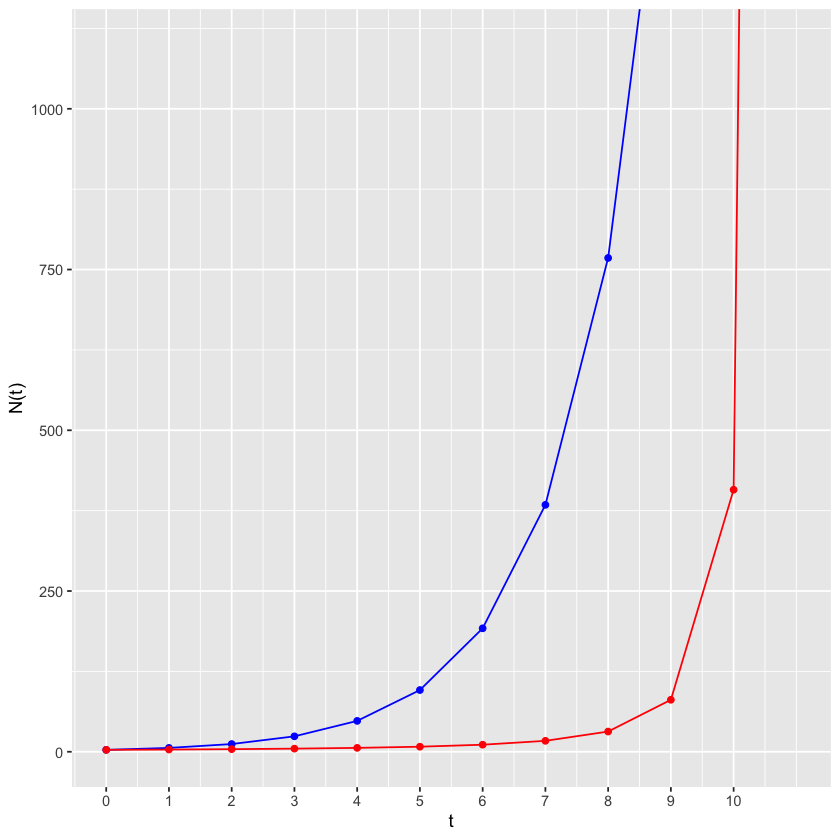

In [2]:
library(ggplot2)
#EXPONENTIAL
r <- 1
s <- 0
dt <- 1
t <- 0
N <- 3
time <- 1:(20)
populations1 <- data.frame(size = integer())

for(i in time)
{
  populations1[i, "size"] = N
  dN=(r+s*N)*N*dt;
  N=N+dN
  t=t+dt
}

#ORTHOLOGISTIC
r <- 0
s <- 0.05
dt <- 1
t <- 0
N <- 3
time <- 1:(20)
populations2 <- data.frame(size = integer())

for(i in time)
{
  populations2[i, "size"] = N
  dN=(r+s*N)*N*dt;
  N=N+dN
  t=t+dt
}

#PLOTTING
library(ggplot2)
ggplot() +
  geom_point(data=populations1, aes(x=0:19, y=size), color="blue") + #data points of exponential
  geom_line(data=populations1, aes(x=0:19, y=size), color="blue") + #line for exponential growth
  geom_point(data=populations2, aes(x=0:(19), y=size), color="red") + #data points of orthologistic
  geom_line(data=populations2, aes(x=0:(19), y=size), color="red") + #line for orthologistic growth
  coord_cartesian(ylim=c(0, 1100), xlim=c(0,11)) + #limits of x and y axis, allows for out of bounds line
  xlab("t") + #label for x axis
  ylab("N(t)") + #label for y axis
  scale_x_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10)) + #tick labels for x axis
  scale_y_continuous(breaks=c(0,250,500,750,1000)) #tick labels for y axis

The blue line shows the unlimited bacterial growth (exponential growth) that helped lead Darwin to his idea of natural selection. The red line illustrates the new "density-enhanced growth" just being considered, where growth rate increases with density.

Because it approaches a line that is orthogonal to the line   approached by the logistic model, described later, we call   this an "orthologistic model." It runs away to in
finity so quickly that it essentially gets there in a
finite amount of time. In physics and mathematics this situation is called a "singularity" - a place where the rules break down. To understand this, it is important to remember that all models are simpli
cations and therefore approximations, and apply in their speci
c range. The orthologistic model applies well at low densities, where greater densities mean greater growth.But a different model will take over when the densities get too high. In fact, if a population is following an orthologis  tic model, the model predicts that there will be some great change that will occur in the near future|before the time of the singularity.

In physics, models with singularities command special attention, for they can reveal previously unknown phenomena. Black holes are one example, while a more mundane one from  physics is familiar to all. Consider a spinning coin with one point touching the table, spinning ever more rapidly as friction and gravity compel the angle between the coin and the table to shrink with time. It turns out that the physical equations that quite accurately model this spinning coin include a singularity - a place where the spinning of the coin becomes in
nitely fast at a de
nite calculable time. Of course, the spinning cannot actually become in
finitely fast. As the coin gets too close to the singularity - as its angle dips too near the table - it merely switches to a different model. That different model is a stationary coin. The exact nature of the transition
between the spinning and stationary states is complex and debated, but the inevitability of the transition is not.

It is no different in ecology. Reasonable models leading to singularities are not to be discounted, but rather considered admissible where they apply. They arise inescapably in human population growth, considered in the next chapter.

## Density-limited growth
What about outside of the range of the orthologistic model? Think of the same Black-Eyed Susans, not only close enough that pollinators can
flit fluently from one to another, but also crowded so that they start to shade one another, and their roots start to compete for water and nutrients. What is a suitable model for this?

The growth rate will again depend on the number of
plants, but now more plants will _reduce_ the growth rate. That just means a minus sign on $s$.

$$
\frac{1}{N}\frac{\Delta N}{\Delta t}=r+sN, \qquad \boldsymbol{s<0}
$$

Again, $r$ is the number of offspring each will produce if it is alone in the world, but with $s$ negative, $s$ is the number each plant will be $unable to produce$ for each additional plant
that appears in its vicinity.

Suppose we have $r = 1$ and $s = -1/1000$, and we start with three plants, so $N(0) = 3$. Here is the code, with the new negative $s$.

```r
r <- 1
s <- -0.001 #This is the new negative s
dt <- 1
t <- 0
N <- 3
time <- 1:(20)
print(N)

for(i in time)
{
  dN=(r+s*N)*N*dt;

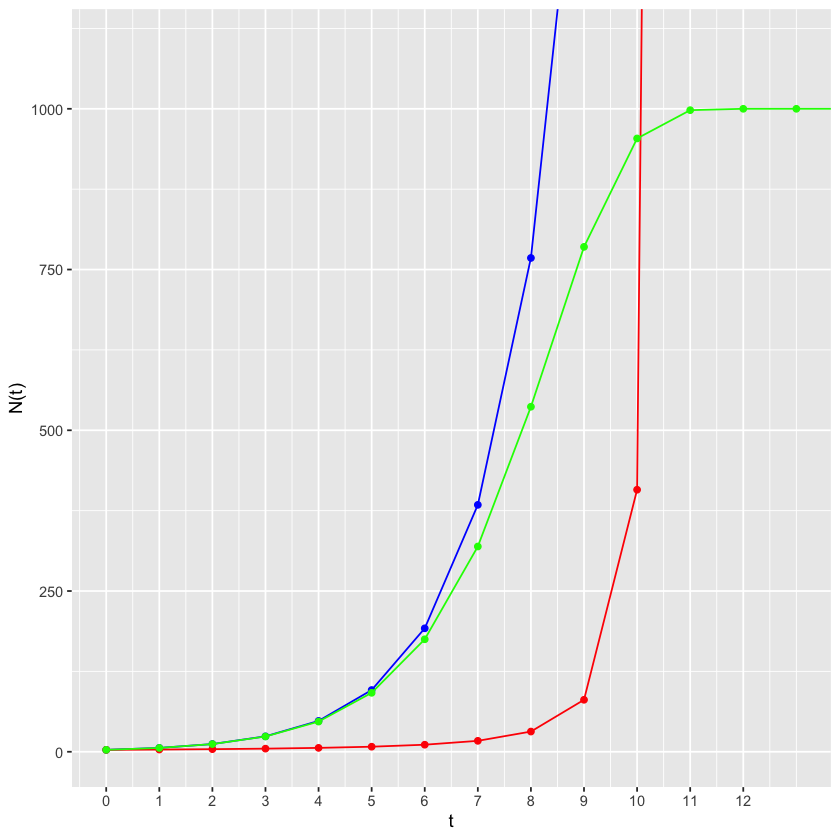

In [3]:
#to save the logistic growth into a dataframe
#LOGISTIC
r <- 1
s <- -0.001
dt <- 1
t <- 0
N <- 3
time <- 1:(20)
populations3 <- data.frame(size = integer())

for(i in time)
{
  populations3[i, "size"] = N
  dN=(r+s*N)*N*dt;
  N=N+dN
  t=t+dt
}

#PLOTTING
ggplot() +
  geom_point(data=populations1, aes(x=0:19, y=size), color="blue") +
  geom_line(data=populations1, aes(x=0:19, y=size), color="blue") +
  geom_point(data=populations2, aes(x=0:(19), y=size), color="red") +
  geom_line(data=populations2, aes(x=0:(19), y=size), color="red") +
  geom_point(data=populations3, aes(x=0:(19), y=size), color="green") + #new points for logistic model
  geom_line(data=populations3, aes(x=0:(19), y=size), color="green") + #lines for logistic growth
  coord_cartesian(ylim=c(0, 1100), xlim=c(0,13)) +
  xlab("t") +
  ylab("N(t)") +
  scale_x_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10,11,12)) +
  scale_y_continuous(breaks=c(0,250,500,750,1000))

  geom_line(data=populations3, aes(x=0:(19), y=size), color="green") + #lines for logistic growth
  coord_cartesian(ylim=c(0, 1100), xlim=c(0,13)) +
  xlab("t") +
  ylab("N(t)") +
  scale_x_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10,11,12)) +
  scale_y_continuous(breaks=c(0,250,500,750,1000))
```
The value at which it levels off is called an "equilibrium," a value where the dynamical system becomes quiescent and stops changing. In the case of the logistic equation, it is also called the "carrying capacity," a level at which the environment cannot "carry" any larger population.

But why 1000? What value of $1/N / ΔN/Δt$ will make the population level off? When $ΔN$ is $0$, that means "the change in $N$ is zero." And that means $N$ stops growing. And when $ΔN$ is zero, the entire term on the left is zero and algebra proceeds as follows.

$$
\begin{align*}
\frac{1}{N}\frac{\Delta N}{\Delta t}&=r+sN \\
0&=r+sN \\
-sN&=r \\
N&=-r/s
\end{align*}
$$

So the carrying capacity is $-r/s$. In [Figure 4.3] , $-r/s=-1/(-0.001) = 1000$. Exactly where it ended up! This is the celebrated logistic equation," published in 1838 by Pierre Verhulst.⋆ It is commonly written

$$
\frac{1}{N}\frac{\Delta N}{\Delta t}=rN \left(1-\frac{N}{K} \right)
$$

Notice that when $N$ is equal to $K$, the factor in parentheses on the right becomes $1-N/N=1-1=0$, so the whole growth term $ΔN/Δt$ becomes zero and the population stops growing. Thus $K$ is carrying capacity, and therefore $K=-r/s$. As an exercise, you might want substitute $-r/s$ for $K$ in the equation above, then simplify and see if you get the $r + sN$ formulation.

##Parameter combinations
Before moving further, consider all possible combinations of the parameters, as determined by their signs. There are six possibilities, ignoring growth rates of exactly zero as in
nitely unlikely.

1. $r>0, s>0 \qquad$ Orthologistic growth.
2. $r<0, s>0 \qquad$ Orthologistic growth with an Allee point.
3. $r>0, s=0 \qquad$ Exponential growth.
4. $r>0, s<0 \qquad$ Logistic growth with a carrying capacity.
5. $r<0, s<0 \qquad$ Inviable population declining to extinction.
6. $r<0, s=0 \qquad$ Same as above.

[Figure 4.4] shows three of these possibilities pieced to gether to form a complete population model. On the left in the fi
gure, number 2 above, orthologistic growth with an [Allee point], prevails at low densities, where larger numbers of other members of the species in the vicinity enhance growth. In the middle, number 3 above, exponential growth, occurs as a transition phase. Finally on the right, number 4 above, logistic growth with a carrying capacity, takes over when crowding and other limitations reduce growth rates as larger numbers of other members of the species in the vicinity appear.

The vertical axis in [Figure 4.4] shows the individual growth Rate, and the horizontal axis shows the population density. On the right, where the slope is negative, as the density approaches $-r/s$ from the left the growth rate on the vertical axis drops to zero, so the population stops growing.

[Figure 4.4]
This is the equilibrium value called the "carrying capacity." If something pushes the population above that value- immigration of animals from another region, for example- then the growth rate on the vertical axis drops below zero. The growth rate then is negative, and therefore the population declines. On the other hand, if something drops the population below that value - such as emigration of animals to another place - the growth rate on the vertical axis rises above zero. That growth rate is positive, and therefore the population grows.

The carrying capacity is "stable." A value is said to be stable if it tends to restore itself when it is pushed away by some outside force.

The situation is entirely different on the left in the
figure, where the slope is positive. As on the right, when the density is $-r/s$, the growth rate on the vertical axis reaches zero, meaning the population does not change. This is an equilibrium too - not a carrying capacity, but an [Allee point]. However, if the population here drifts below $-r/s$, the growth rate on the vertical axis becomes negative and the population declines further still. It is unstable. In this model the population continues to decline until eventual extinction. Above the Allee point, however, the growth rate on the vertical axis
is positive, so the population increases until it reaches some other limitation.

A species thus becomes endangered when its population drops below its Allee point, and if it is to be saved something must be done to change that point. The parameter `r` must somehow be increased - by restoring habitat, reducing predation by humans, or using arti
cial reintroductions or other conservation programs (e.g., Figure 4.5).

##Generalization
In summary the macroscale model for population dynamics of a single species, in its simplest form, is

$$
\frac{1}{N}\frac{\Delta N}{\Delta t}=r+sN
$$
<div style="text-align: right"> (4.1) </div>

This is a straight-line form of a more general form presented by [Hutchinson](),

$$
\frac{1}{N}\frac{\Delta N}{\Delta t}=r+sN+s_{2}N^2+s_{3}N^3+s_{4}N^4+...
$$
<div style="text-align: right"> (4.2) </div>

and of the most general form proposed by [Kolomogorov](),where $f(N)$ can be any function of the population density $N$.

$$
\frac{1}{N}\frac{\Delta N}{\Delta t}=f(N)
$$
<div style="text-align: right"> (4.3) </div>

The higher-order terms in Equation 4.2 could re
ne population projections if there were enough data to determine them. They are not really needed, however, because straight-line parts can be pieced together to form a general population growth curve, as in Figure 4.4. And as human population
growth in Figure 6.3 will show, a piecewise approach can more closely approximate the real situation.

Moreover, blending separate versions of Equation 4.1 can generalize to either the Hutchinson or Kolomorgov forms, 4.2 and 4.3, as you will see in Chapter 18.